
# Reproducing "The Shadows Lurking in the Equations" — Fuzzy Graphs

This notebook recreates the examples from [gods.art — *The Shadows Lurking in the Equations*](https://gods.art/articles/equation_shadows.html) using a minimal "fuzzy/non-binary" renderer.

**Idea:** For an implicit equation \(F(x,y)=0\), plot an intensity image based on the residual \(|F(x,y)|\). Small residuals are bright; large residuals are dark, revealing "shadows" (high-error) and near-solutions (underwater islands).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzygraph import View, mesh, residual, fuzzy_image, save_png
import equations as E
import scienceplots
plt.style.use(['science','notebook','ieee',])
plt.rcParams.update({
    # "text.usetex": True,
    "font.serif": ["Times New Roman"], 
    })




# Plot helper
def show_fuzzy(F, view=View(), *, alpha=2.5, gamma=1.8, clip=None, title=None):
    I = fuzzy_image(F, view, alpha=alpha, gamma=gamma, clip=clip)
    fig, ax = plt.subplots(figsize=(6,6), dpi=150)
    im = ax.imshow(I, cmap='magma', origin='lower', interpolation='bicubic')
    # ax.set_axis_off(); 
    ax.set_title(title); ax.set_aspect('equal')
    fig.colorbar(im, label='Intensity Matching', shrink=0.8)
    plt.show()


## Example 1 — Slash Dot Equation

F = y/(x^2+y^2) - (x+1)/(x^2+y^2)  
We expect a dark 'hole' near the origin due to the denominator.

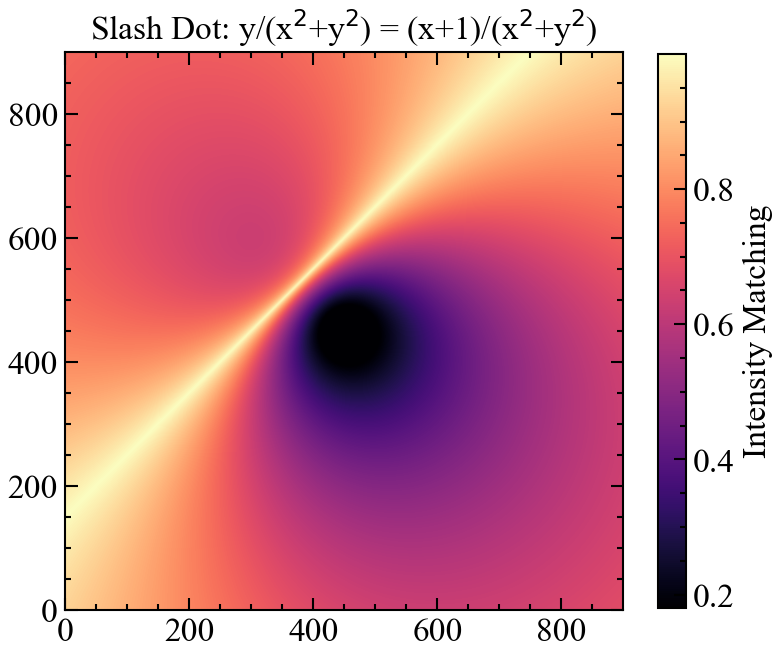

In [2]:
show_fuzzy(E.F_slashdot, View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), alpha=3.0, gamma=2.0, clip=10, title='Slash Dot: y/(x$^2$+y$^2$) = (x+1)/(x$^2$+y$^2$)')

## Example 2 — Quasar Equation

F = y - x/(x^2+y^2)

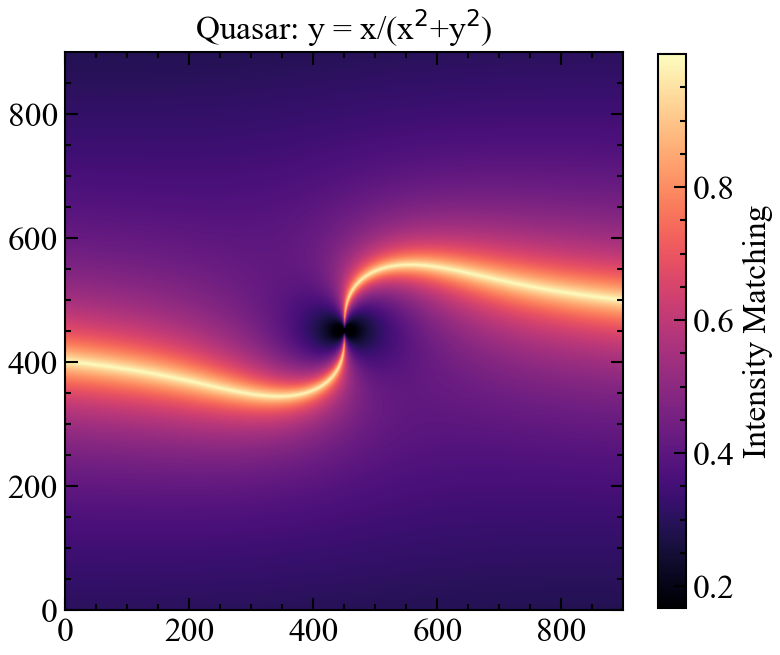

In [3]:
show_fuzzy(E.F_quasar, View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), alpha=3.5, gamma=2.0, clip=10, title='Quasar: y = x/(x$^2$+y$^2$)')

## Example 3 — Star & Black Hole

Star/particle: x^2+y^2 = 0  
Black hole inversion: 1/(x^2+y^2) = 0

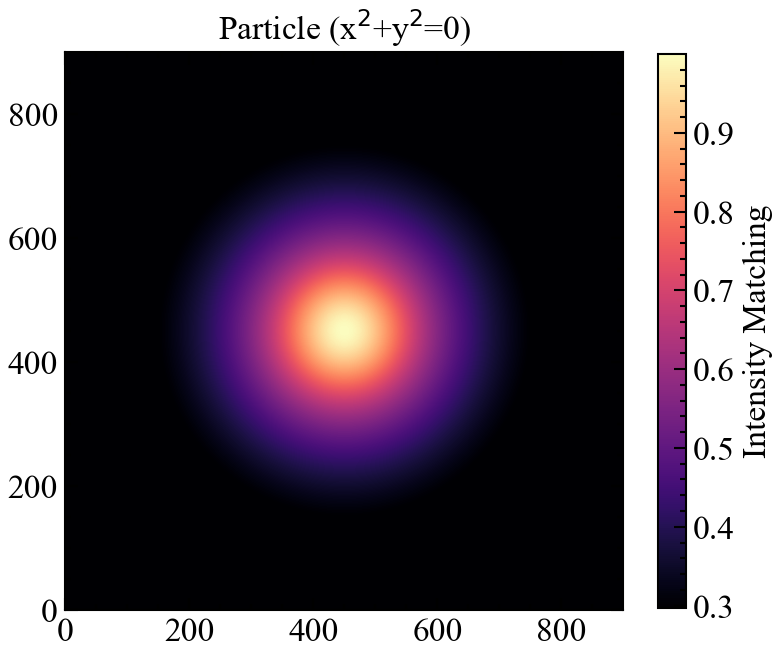

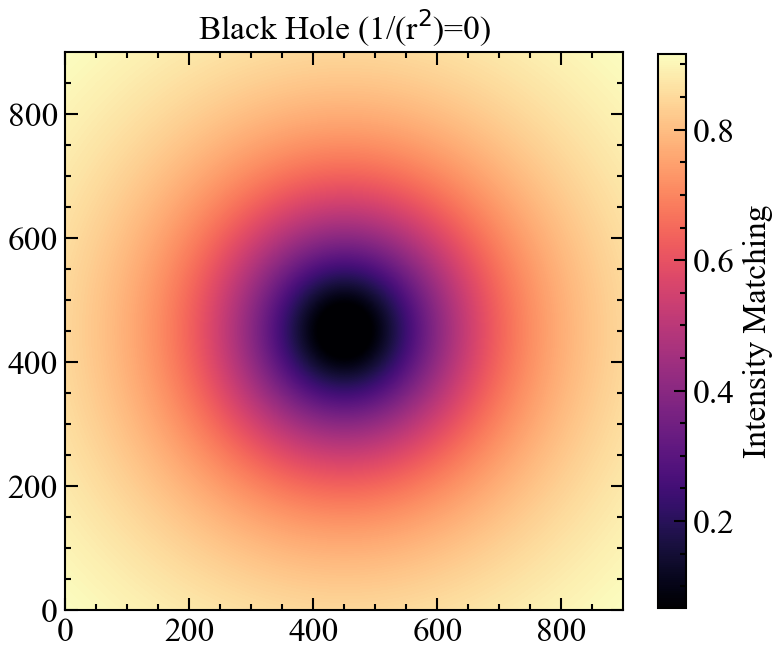

In [4]:
show_fuzzy(E.F_particle, View(xlim=(-1.5,1.5), ylim=(-1.5,1.5), res=(900,900)), alpha=6.0, gamma=1.6, clip=1.0, title='Particle (x$^2$+y$^2$=0)')
show_fuzzy(E.F_blackhole, View(xlim=(-1.5,1.5), ylim=(-1.5,1.5), res=(900,900)), alpha=0.5, gamma=1.2, clip=50.0, title='Black Hole (1/(r$^2$)=0)')

## Example 4 — Shadow Line

(y-x)*(y+x)=0 vs (x-y)/(x+y)=0 (one factor inverted)

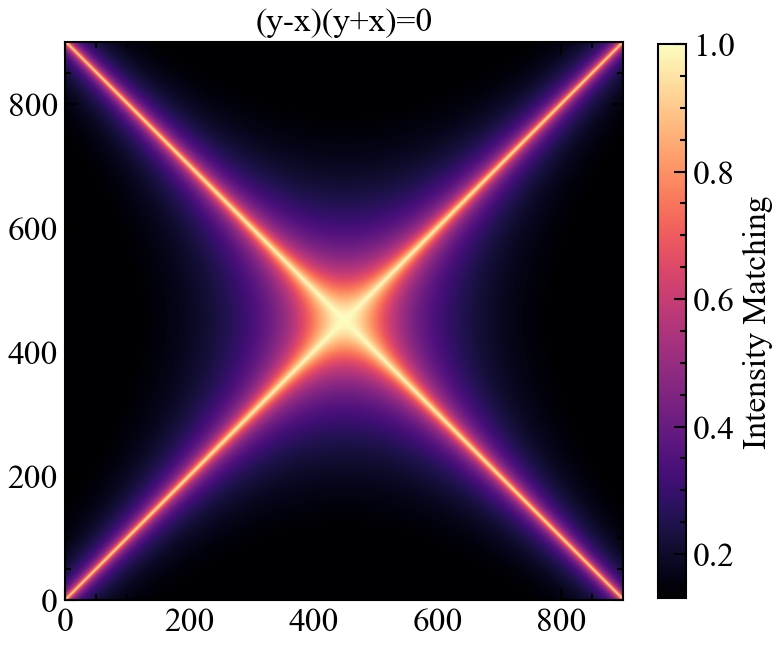

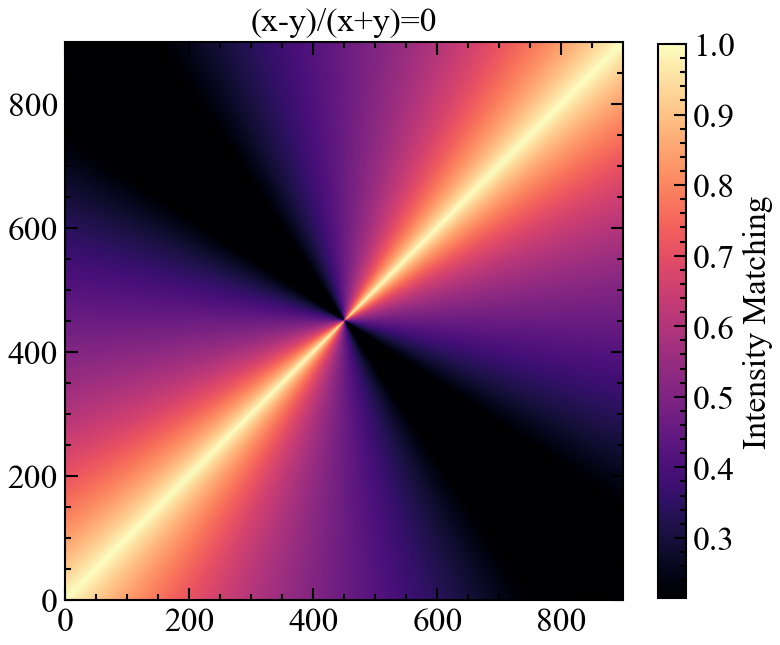

In [5]:
show_fuzzy(E.F_shadowline_mult, View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), alpha=5.0, gamma=1.6, clip=5.0, title='(y-x)(y+x)=0')
show_fuzzy(E.F_shadowline_div, View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), alpha=3.0, gamma=1.8, clip=5.0, title='(x-y)/(x+y)=0')

## Example 5 — Phi Equation

x*(x^2+y^2-1)=0 vs x/(x^2+y^2-1)=0 (circle factor inverted)

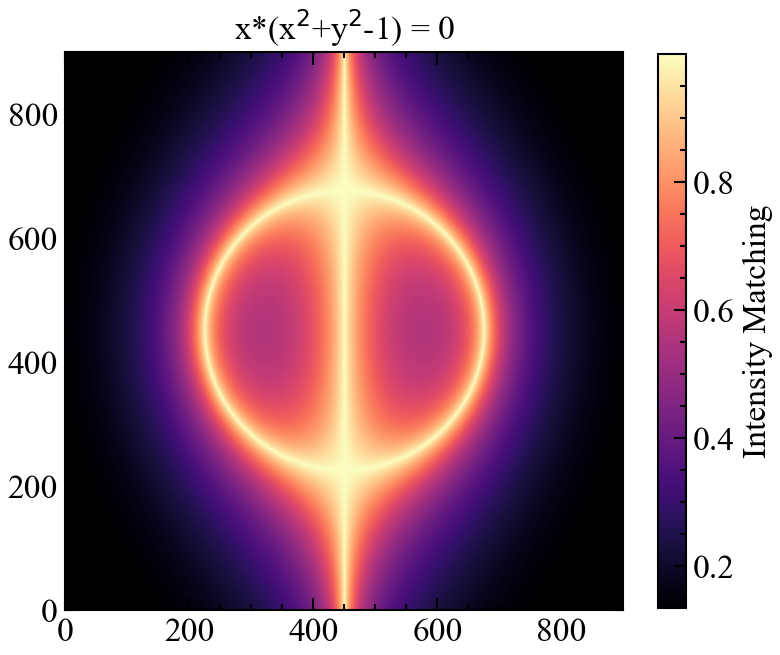

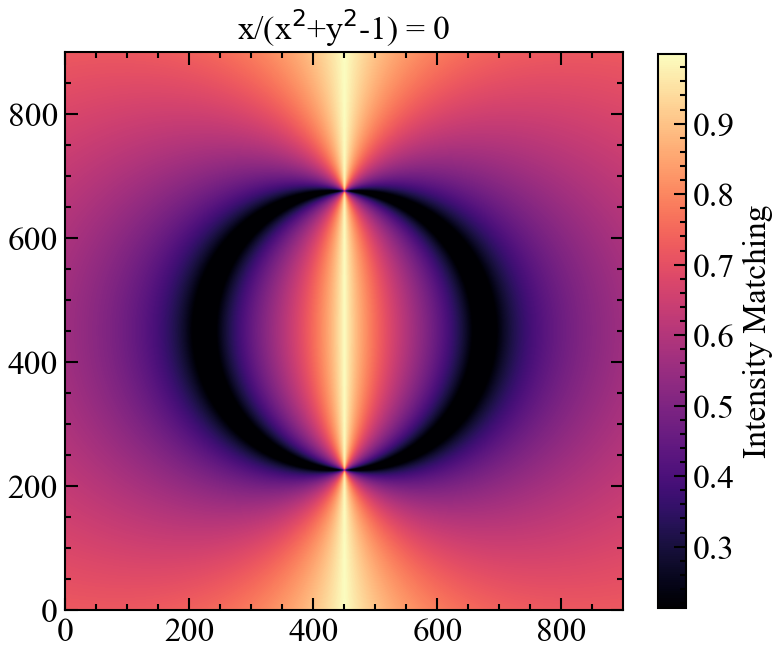

In [6]:
show_fuzzy(E.F_phi_mult, View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), alpha=4.0, gamma=1.6, clip=6.0, title='x*(x$^2$+y$^2$-1) = 0')
show_fuzzy(E.F_phi_div, View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), alpha=3.0, gamma=1.9, clip=6.0, title='x/(x$^2$+y$^2$-1) = 0')

## Example 6 — Underwater Islands

y = 4 sin(x) + sin(2.7 y) -> hidden near-solutions; tweak 2.7→2.8 to surface islands

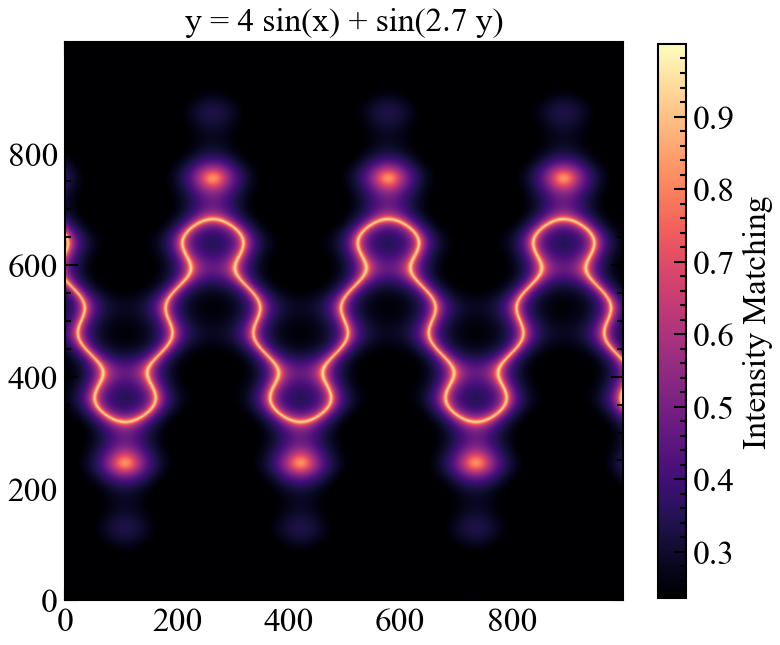

In [7]:
show_fuzzy(E.F_islands, View(xlim=(-10,10), ylim=(-10,10), res=(1000,1000)), alpha=2.5, gamma=1.8, clip=5.0, title='y = 4 sin(x) + sin(2.7 y)')


---
# Extra Gallery — Fun & Complex Implicit Forms
A grab‑bag of classics (heart, lemniscates, Cassini), polynomial lemniscates (|p(z)|=const), transcendental fields, and smooth CSG blends.


In [8]:

import equations_extended as EX
from fuzzygraph import View
def show(F, view, **kw):
    # alias with sane defaults
    show_fuzzy(F, view, alpha=3.0, gamma=1.8, clip=8.0, **kw)


## Classics

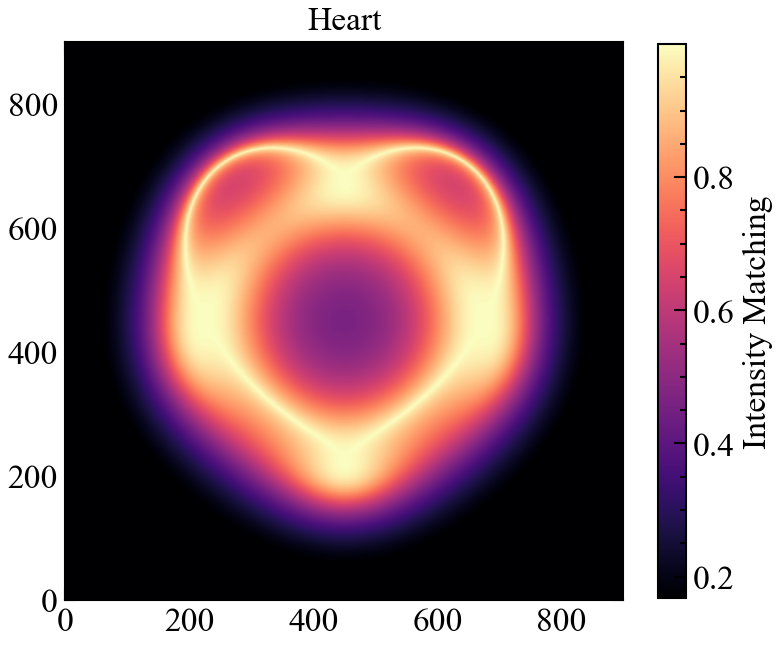

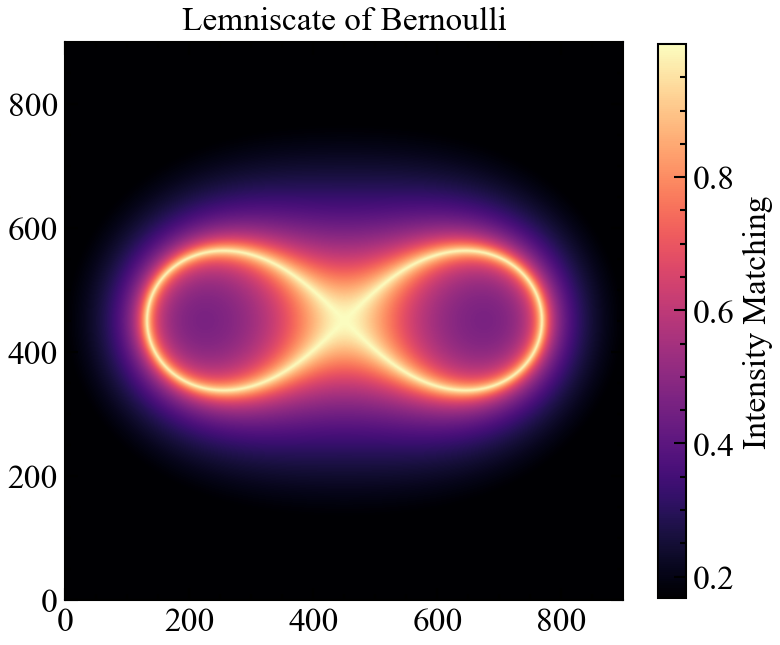

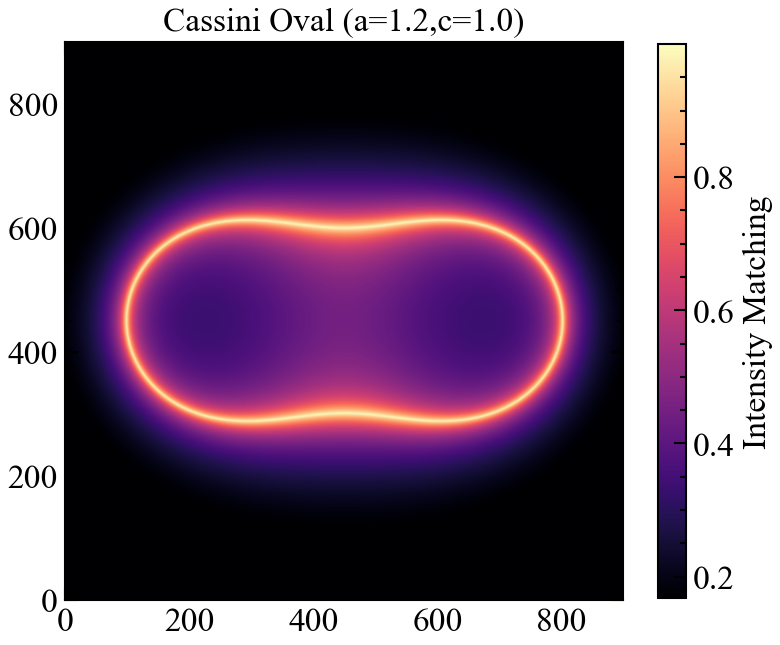

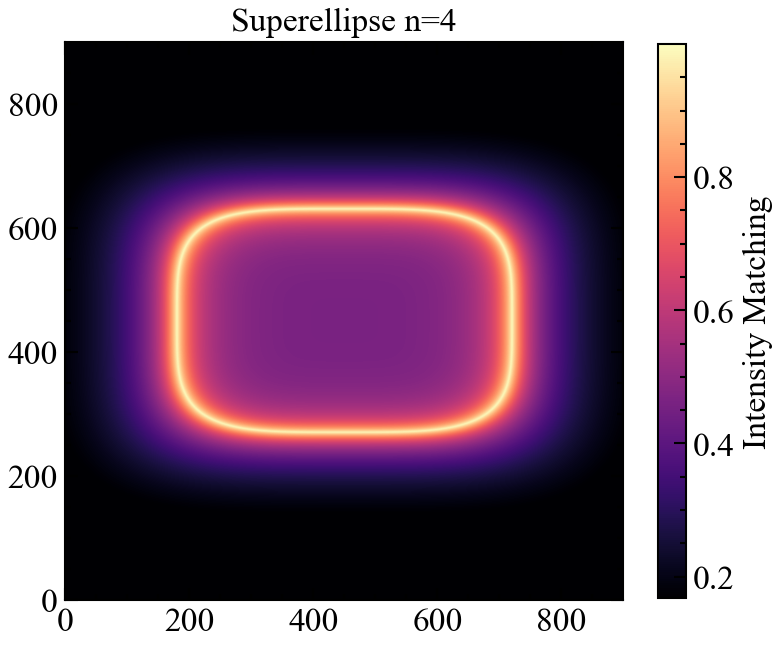

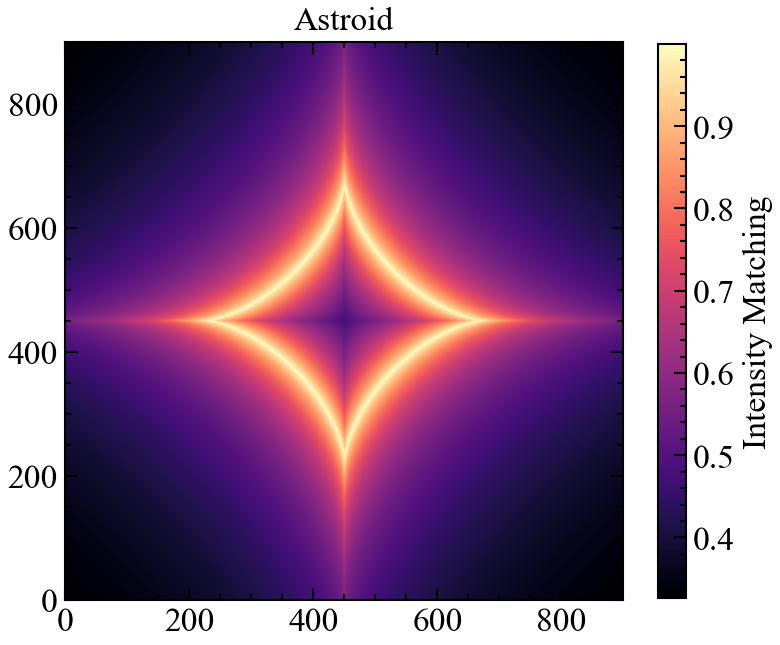

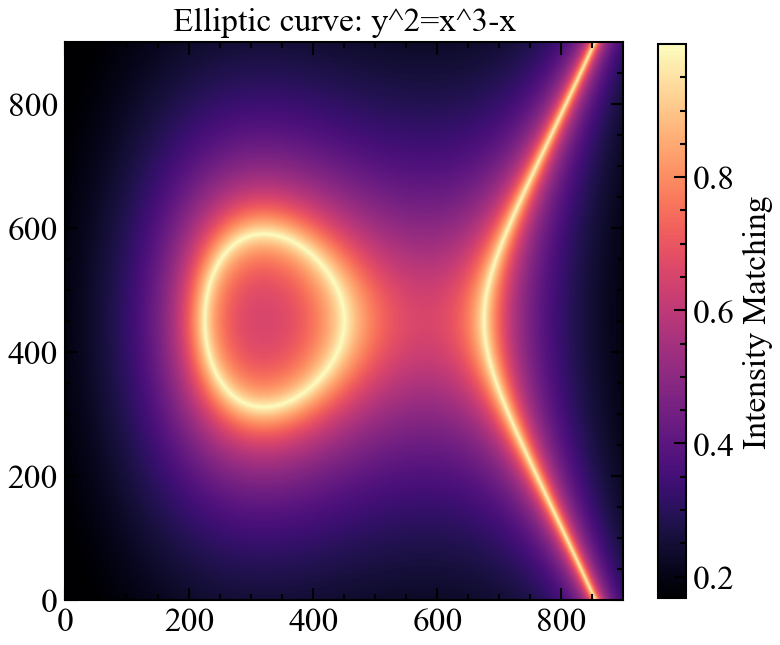

In [9]:

show(EX.F_heart, View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Heart')
show(lambda x,y: EX.F_lemniscate_bern(x,y,a=1.0), View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Lemniscate of Bernoulli')
show(lambda x,y: EX.F_cassini(x,y,a=1.2,c=1.0), View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Cassini Oval (a=1.2,c=1.0)')
show(lambda x,y: EX.F_superellipse(x,y,a=1.2,b=0.8,n=4.0), View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Superellipse n=4')
show(lambda x,y: EX.F_astroid(x,y,a=1.0), View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Astroid')
show(EX.F_elliptic_curve, View(xlim=(-2,2), ylim=(-2,2), res=(900,900)), title='Elliptic curve: y^2=x^3-x')


## Polynomial lemniscates (|p(z)|=const)

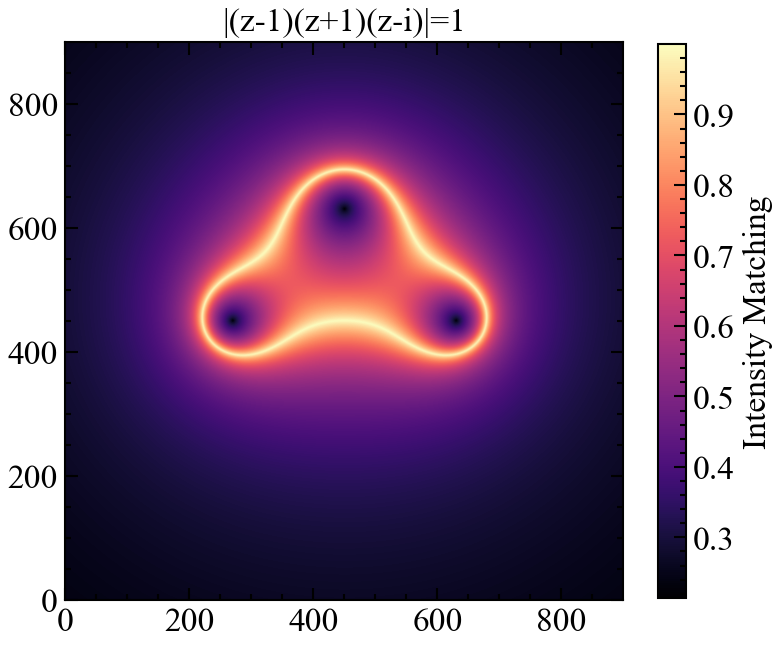

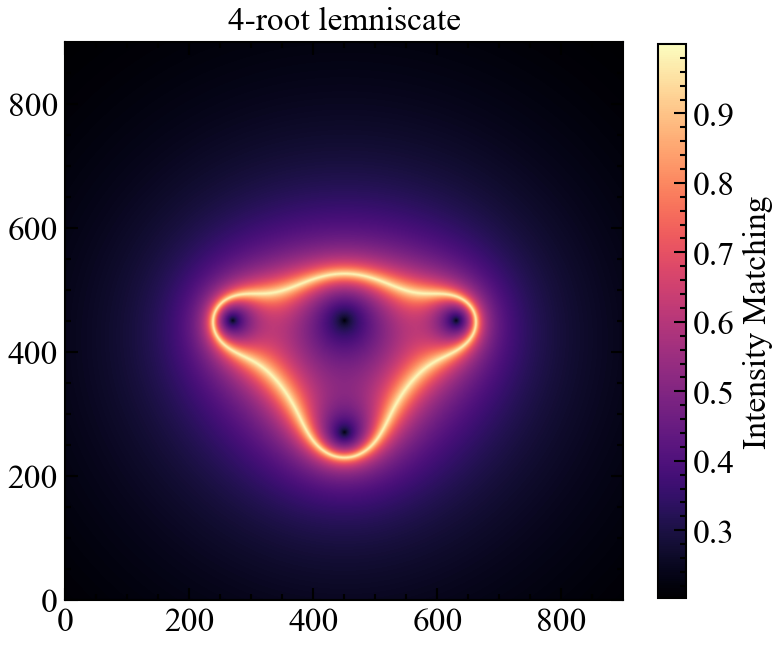

In [10]:

roots = [(1,0), (-1,0), (0,1)]
show(lambda x,y: EX.F_poly_lemniscate(x,y,roots=roots,radius=1.0), View(xlim=(-2.5,2.5), ylim=(-2.5,2.5), res=(900,900)), title='|(z-1)(z+1)(z-i)|=1')
roots2 = [(1,0), (0,0), (-1,0), (0,-1)]
show(lambda x,y: EX.F_poly_lemniscate(x,y,roots=roots2,radius=0.7), View(xlim=(-2.5,2.5), ylim=(-2.5,2.5), res=(900,900)), title='4-root lemniscate')


## Transcendental & radial

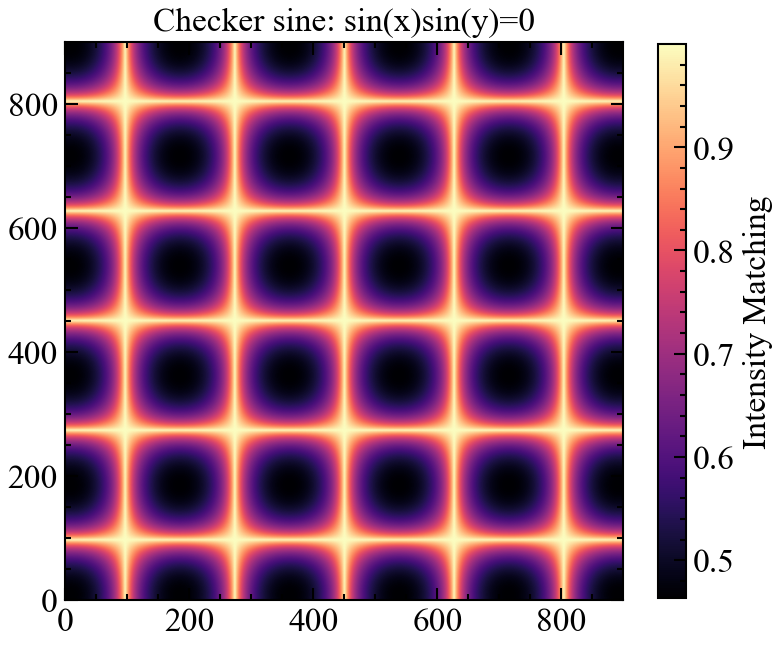

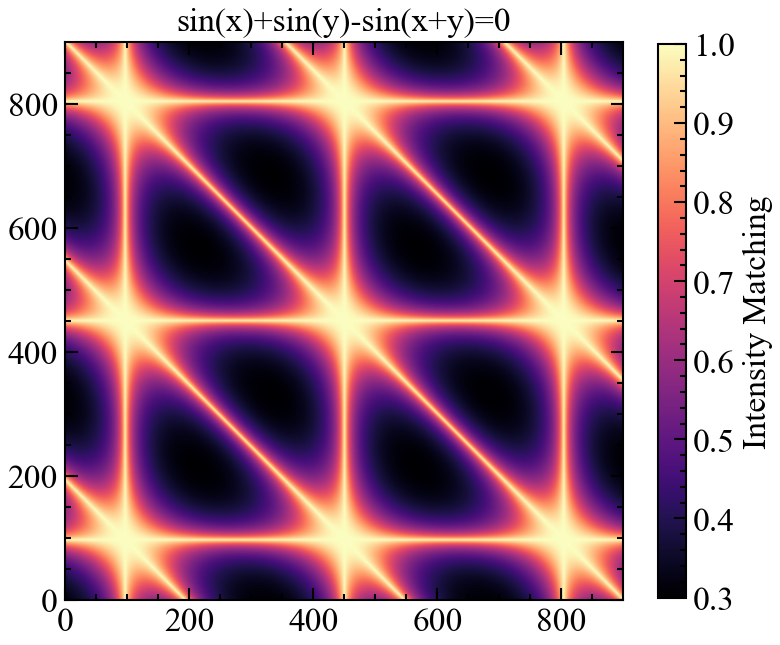

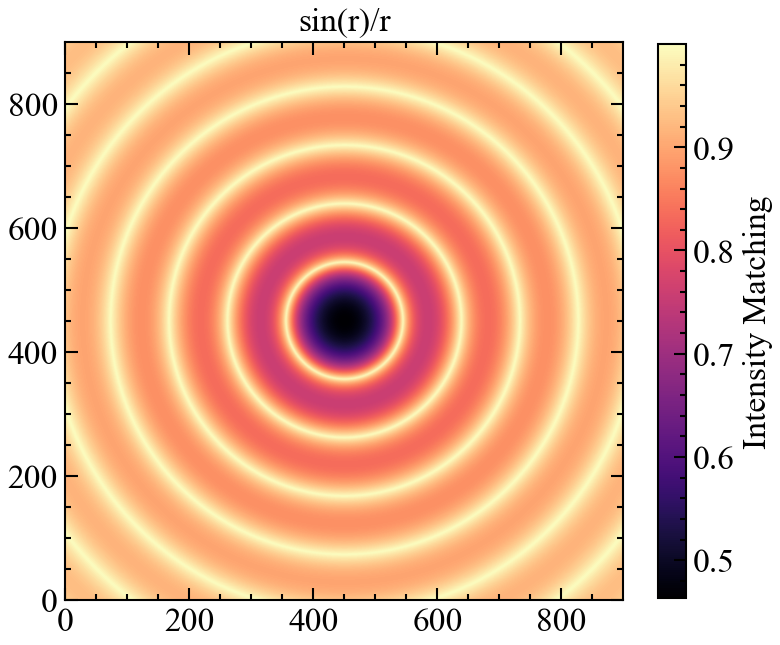

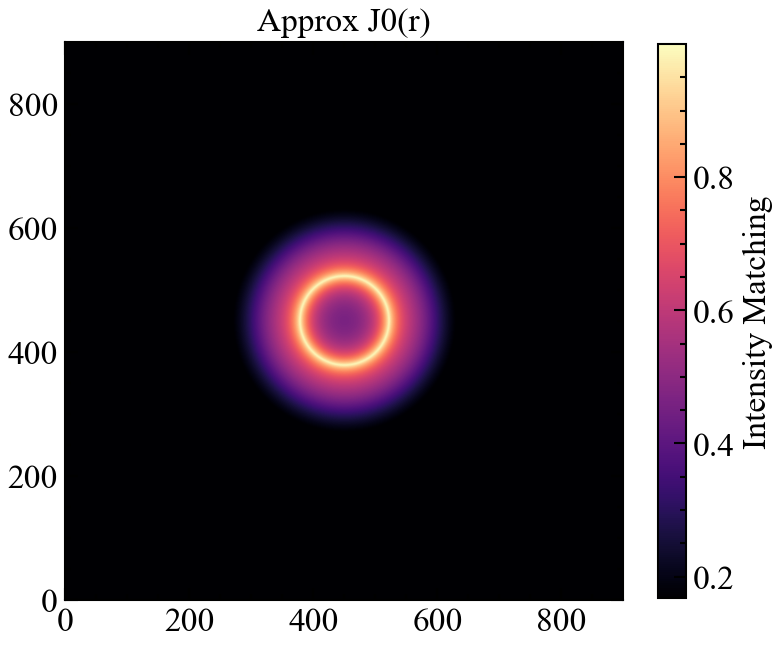

In [11]:

show(EX.F_checker_sine, View(xlim=(-8,8), ylim=(-8,8), res=(900,900)), title='Checker sine: sin(x)sin(y)=0')
show(EX.F_sumdiff_sine, View(xlim=(-8,8), ylim=(-8,8), res=(900,900)), title='sin(x)+sin(y)-sin(x+y)=0')
show(EX.F_sinx_over_r, View(xlim=(-15,15), ylim=(-15,15), res=(900,900)), title='sin(r)/r')
show(EX.F_besselJ0, View(xlim=(-15,15), ylim=(-15,15), res=(900,900)), title='Approx J0(r)')


## Energy landscape toy

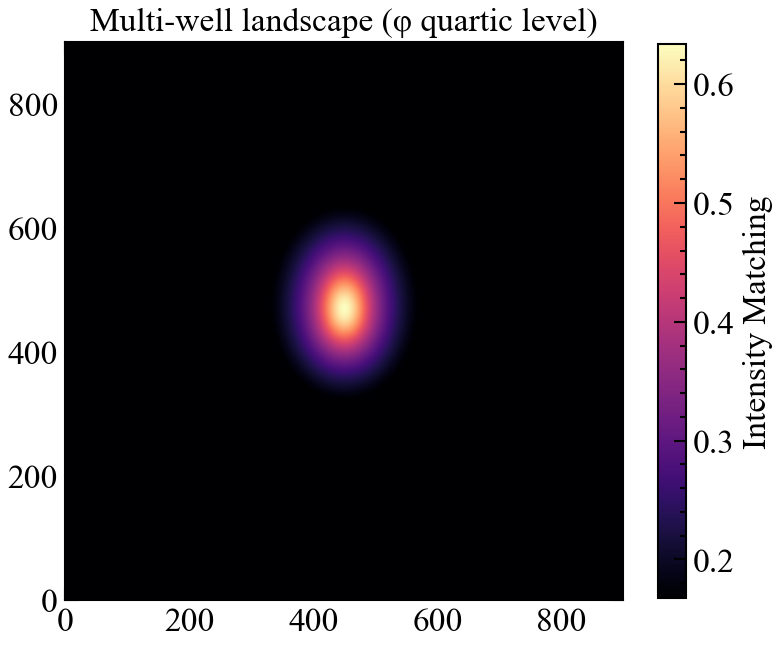

In [12]:

show(EX.F_multiwell, View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), title='Multi-well landscape (φ quartic level)')



---
# Colorized Fuzzy Renderer (palettes + inversion)


In [13]:

from fuzzygraph import View, fuzzy_image, colorize
import matplotlib.pyplot as plt
import equations as EX

def show_color(F, view=View(), *, alpha=3.0, gamma=1.8, clip=None, cmap='magma', invert=False, title=None):
    I = fuzzy_image(F, view, alpha=alpha, gamma=gamma, clip=clip)
    rgba = colorize(I, cmap_name=cmap, invert=invert)
    plt.figure(figsize=(6,6), dpi=150)
    plt.imshow(rgba, origin='lower', interpolation='bicubic')
    if title: plt.title(title)
    plt.axis('off')
    plt.show()


## Robust Soft CSG (fixed)

/Users/paraskoundal/CodeProjects/projectEnvs/kaggleEnv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8852 (\N{SQUARE CUP}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


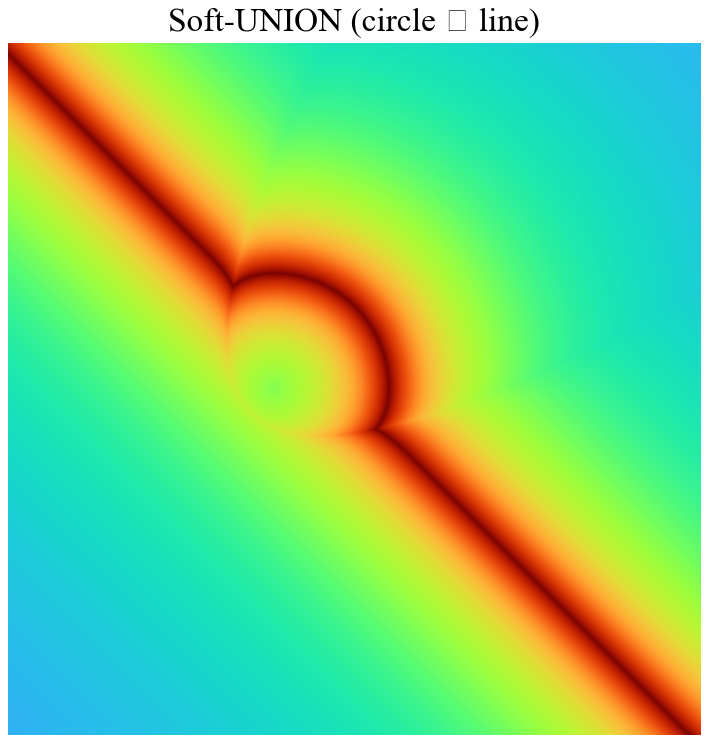

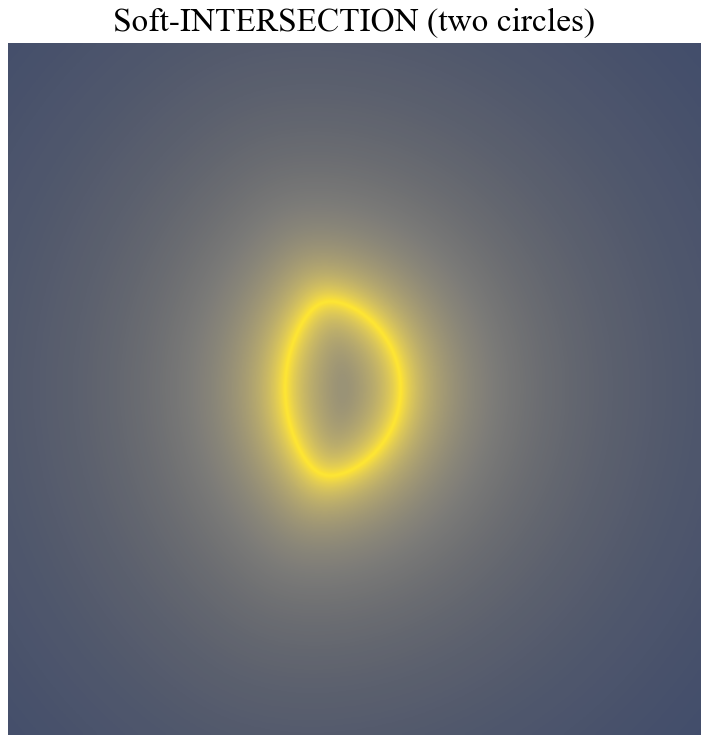

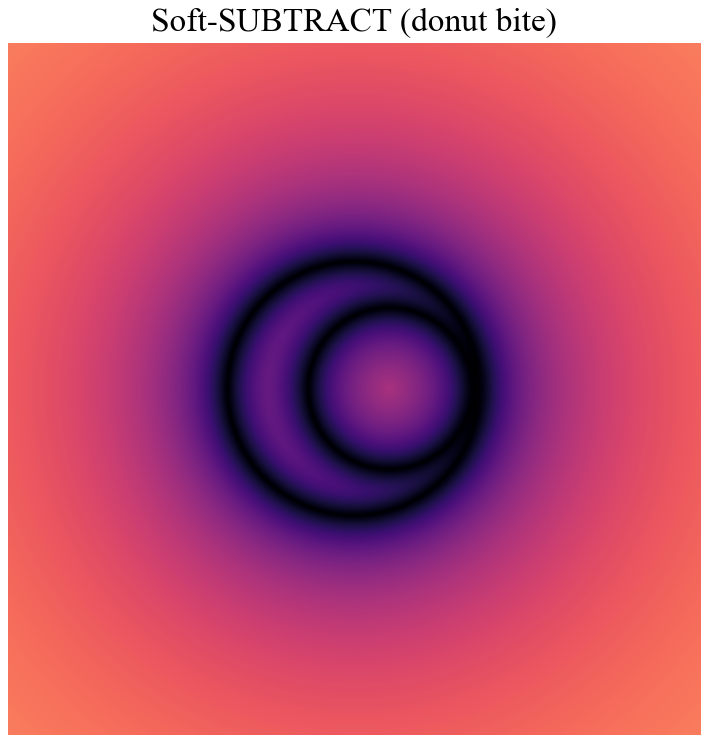

In [14]:

show_color(lambda x,y: EX.F_soft_union(x,y,k=14.0), View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), cmap='turbo', title='Soft-UNION (circle ⊔ line)')
show_color(lambda x,y: EX.F_soft_intersection(x,y,k=14.0), View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), cmap='cividis', title='Soft-INTERSECTION (two circles)')
show_color(lambda x,y: EX.F_soft_subtract(x,y,k=14.0), View(xlim=(-3,3), ylim=(-3,3), res=(900,900)), cmap='magma', invert=True, title='Soft-SUBTRACT (donut bite)')


## Superformula / Roses / Lissajous

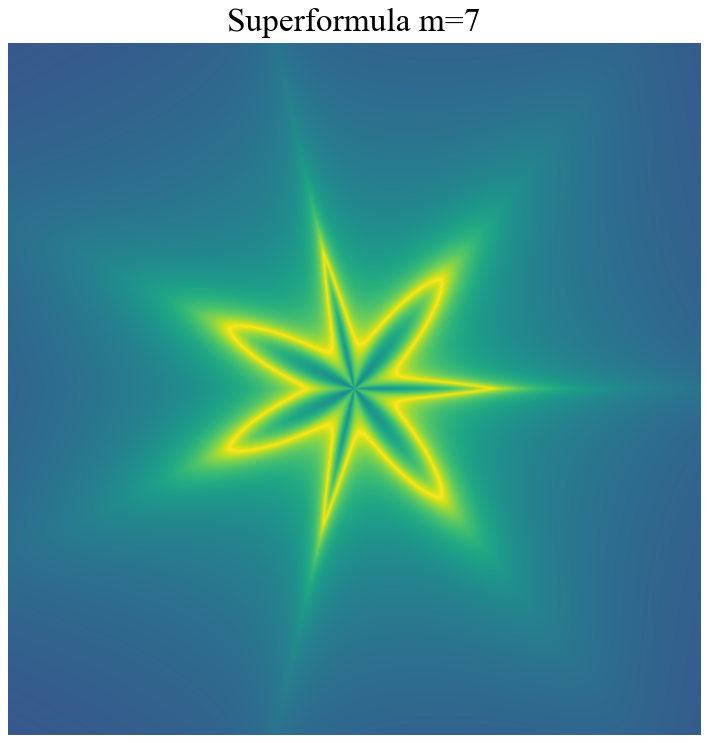

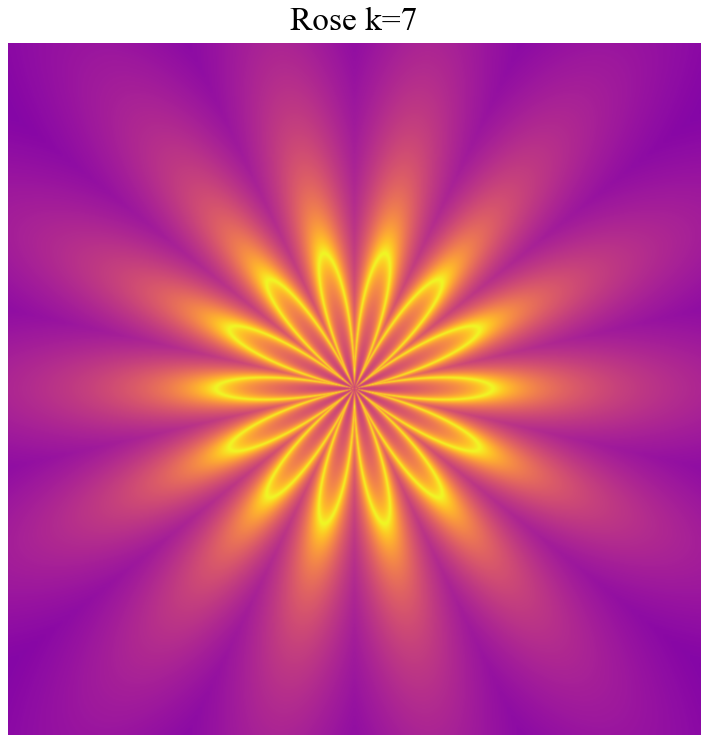

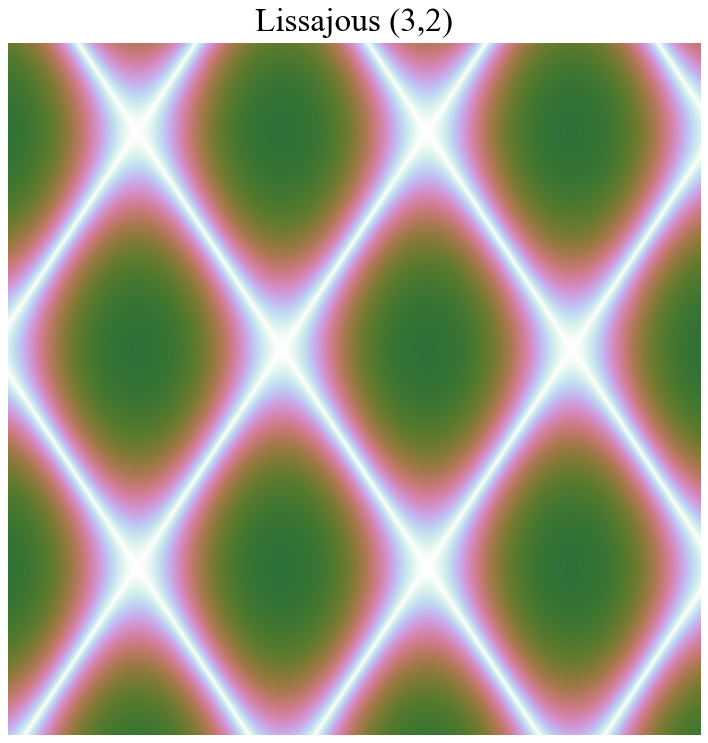

In [15]:

show_color(lambda x,y: EX.F_superformula(x,y,m=7,n1=0.2,n2=1.7,n3=1.1), View(xlim=(-2.5,2.5), ylim=(-2.5,2.5), res=(1000,1000)), cmap='viridis', title='Superformula m=7')
show_color(lambda x,y: EX.F_rose(x,y,k=7), View(xlim=(-2.5,2.5), ylim=(-2.5,2.5), res=(1000,1000)), cmap='plasma', title='Rose k=7')
show_color(lambda x,y: EX.F_lissajous(x,y,ax=3,by=2,delta=1.0), View(xlim=(-2.5,2.5), ylim=(-2.5,2.5), res=(900,900)), cmap='cubehelix', title='Lissajous (3,2)')


## Apollonius Ratio Circles

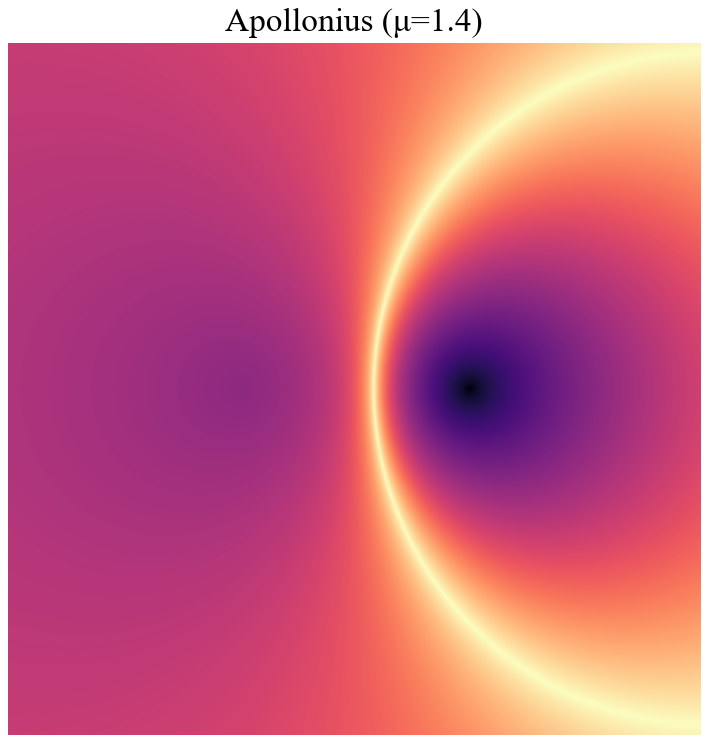

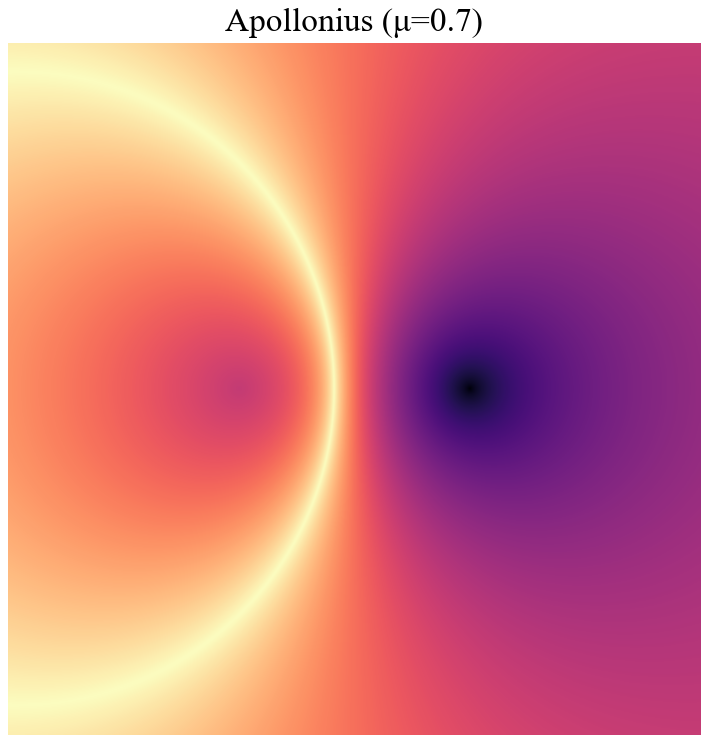

In [16]:

show_color(lambda x,y: EX.F_apollonius(x,y,mu=1.4), View(xlim=(-3,3), ylim=(-3,3), res=(1000,1000)), cmap='magma', title='Apollonius (μ=1.4)')
show_color(lambda x,y: EX.F_apollonius(x,y,mu=0.7), View(xlim=(-3,3), ylim=(-3,3), res=(1000,1000)), cmap='magma', title='Apollonius (μ=0.7)')
